# "Cross-validation" des modèles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm


## Creer des données synthetiques 

In [2]:
def fit_lr(
            N = 150,
            p0 = 0.0,
            theta0 = 0,
            wt = 1/(np.pi/15),
            theta_std = np.pi/6):
    theta = np.random.randn(N)*theta_std
    a = (theta-theta0)*wt
    p = p0/2 + ((1-p0)/(1+np.exp(-a)))
    y = np.random.rand(N) < p 

    from sklearn.linear_model import LogisticRegression
    lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})
    model = LogisticRegression()#**lr_kwargs)
    #model = LogisticRegression(C = 3, max_iter = 100, penalty = 'l2')  
    model.fit(theta[:, None], y)
    return theta, p, y, model



In [3]:
theta, p, y, model = fit_lr()


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.score

In [4]:
#on definit le modele 

p_pred = model.predict_proba(theta[:, None])[:,1]
def get_KL(p_pred, p):
    KL = (p * np.log(p) + (1-p) * np.log(1-p)).sum()
    return KL - (p_pred * np.log(p) + (1-p_pred) * np.log(1-p)).sum()
KL = get_KL(p_pred, p)
print('KL', KL)

KL 27.1268663306


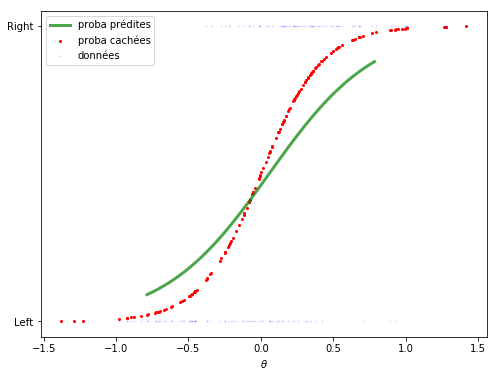

In [8]:
#plot fit 

plt.figure(figsize = (8,6)) 
plt.scatter(theta, p, s=4, color = 'r',label="proba cachées")
plt.scatter(theta, y, s=1, alpha=.1, color = 'b',label="données")
x_values = np.linspace(-2*np.pi/8, 2*np.pi/8, 100)[:, None]
y_values = model.predict_proba(x_values)[:,1]
plt.plot(x_values, y_values, 'g', alpha=.7, lw=3,label="proba prédites")
plt.xlabel(r'$\theta$')
plt.yticks([0.,1.],['Left', 'Right'])
plt.legend ();


Text(0, 0.5, 'pente prédite')

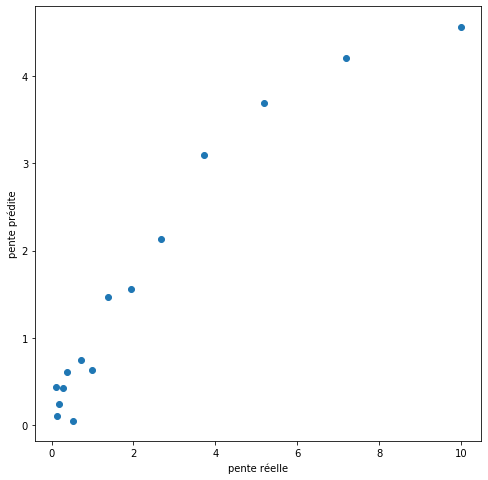

In [5]:
#plot pente prédite/pente réelle

wts = np.logspace(-1, 1, 15, base=10)

wt_pred = []
for wt_ in wts:
    theta, p, y, model = fit_lr(wt=wt_)
    wt_pred.append(model.coef_[0][0])

plt.figure(figsize = (8,8)) 
plt.scatter(wts, wt_pred)
plt.xlabel('pente réelle')
plt.ylabel('pente prédite')


In [6]:
 model.intercept_

array([0.29886661])

## influence du nombre de trials sur KL

Text(0, 0.5, ' KL ')

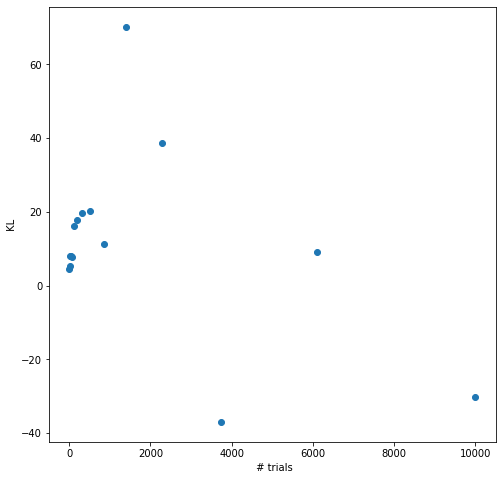

In [22]:
Ns = np.logspace(1, 4, 15, base=10)
KLs = []
for N_ in Ns:
    theta, p, y, model = fit_lr(N=int(N_))
    p_pred = model.predict_proba(theta[:, None])[:,1]
    KLs.append(get_KL(p_pred, p))

plt.figure(figsize = (8,8)) 
plt.scatter(Ns, KLs)
plt.xlabel(' # trials')
plt.ylabel(' KL ')
